In [1]:
# Read and structure experiment data csv
import csv
import numpy as np

exp_data = []
num_max_traders = 24
trials_per_schedule = 77000

filenamebase='collated/random_order_schedule_'
filenameext='.csv'
exp_data = []
for j in range(0, 9):
    new_dict = {}
    new_dict["base"] = []
    new_dict["enhanced"] = []
    exp_data.append(new_dict)
    
for fnum in range(0,9):
    filenamestr = filenamebase + str(fnum) + filenameext
    with open(filenamestr) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')

        for row in csv_reader:
            subtrial = {}
            # subtrial{trial_id, duration, AA{}, GDX{}, ZIP{}}
            subtrial["trial_id"] = row[0]
            subtrial["duration"] = row[1]
            csv_column_offset   = 2
            num_cols_per_trader = 4
            sum_trader_nums = 0
            j = 0
            # trader_stats{balance, num_traders, profit_per}
            while (sum_trader_nums < num_max_traders and "base" in subtrial["trial_id"]) or (sum_trader_nums < num_max_traders+2 and "enhanced" in subtrial["trial_id"]):
                row_id = j * num_cols_per_trader + csv_column_offset
                trader_type                 = row[row_id]
                trader_stats = {}
                trader_stats["balance"]     = float(row[row_id + 1])
                if row[row_id + 2] == ' ':
                    trader_stats["num_traders"] = 0
                else:
                    trader_stats["num_traders"] = int(row[row_id + 2])
                sum_trader_nums += trader_stats["num_traders"]
                trader_stats["profit_per"]  = float(row[row_id + 3])
                subtrial[trader_type] = trader_stats
                j += 1

            if "base" in subtrial["trial_id"]:
                exp_data[fnum]["base"].append(subtrial)
            elif "enhanced" in subtrial["trial_id"]: 
                exp_data[fnum]["enhanced"].append(subtrial)
# Reference guide to experiment data structure:
# exp_data[s_d_schedule_num]["base/enhanced"][trial_num]["trial_id/duration/AA/GDX/ZIP"]['profit_per']
# if trader_code last field is a dict [balance/num_traders/profit_per]
print('Reading in completed.')

Reading in completed.


In [2]:
order_schedule_num   = []
for i in range (0, 770):
    # // performs integer division: quotient without remainder
    order_schedule_num.append(i // 55)
    
    
def type_to_colour(typestring):
    aa_colour   = '#b95a00' # Brown
    gdx_colour  = '#a900df' # Purple
    zip_colour  = '#087e3e' # Dark green
    if typestring   == ' AA' :
        return aa_colour
    elif typestring == ' GDX':
        return gdx_colour
    elif typestring == ' ZIP':
        return zip_colour
    
#enhanced_types_colours = list(map(type_to_colour, enhanced_types))
print("Order schedule numbers set up.")

Order schedule numbers set up.


In [3]:
allfiles_avg_enhanced_profit = []
allfiles_avg_all_profit      = []
allfiles_enhanced_types      = []
allfiles_best_trial_types    = []
allfiles_avg_extra_profit    = []
allfiles_real_best_profit    = []

types = [" AA", " GDX", " ZIP"]
types_without_spaces = ["AA", "GDX", "ZIP"]
num_trials_per = 50
tot_trader_num = 24

def zero_profit_accumulators():
    base_profit_accumulator[" AA"]   = 0
    base_profit_accumulator[" GDX"]  = 0
    base_profit_accumulator[" ZIP"]  = 0
    enhanced_profit_accumulator[" AA"]   = 0
    enhanced_profit_accumulator[" GDX"]  = 0
    enhanced_profit_accumulator[" ZIP"]  = 0




for filenum in range(0,9):
    avg_enhanced_profit  = []
    avg_all_profit       = []
    enhanced_types       = []
    best_trial_types     = []
    avg_extra_profit     = []
    real_best_profit     = []
    
    en_current_exp_data = exp_data[filenum]["enhanced"]
    ba_current_exp_data = exp_data[filenum]["base"]
    base_profit_accumulator = {}
    enhanced_profit_accumulator = {}
    current_trialcount = 0
    for en in en_current_exp_data:
        enhanced_type = ''
        best_trial_type = ''
        list_index = en_current_exp_data.index(en)
        ba = ba_current_exp_data[list_index]
        max_avg_profit_per = -9999
        max_trial_profit_per = -9999

        if current_trialcount ==  0:
            zero_profit_accumulators()
            aap  = 0
        for tr_type in types:
            enhanced_profit_accumulator[tr_type] += en[tr_type]["profit_per"]
            aap  += float(en[tr_type]["balance"])
            try:
                base_profit_accumulator[tr_type] += ba[tr_type]["profit_per"]
            except KeyError:
                pass

        current_trialcount += 1
        if current_trialcount == num_trials_per:
            current_trialcount = 0
            # Determine enhanced trader and best-in-real-trial type from profits
            for tr_type in types:
                try: 
                    if (enhanced_profit_accumulator[tr_type] / num_trials_per > max_trial_profit_per):
                        best_trial_type = tr_type
                        max_trial_profit_per = enhanced_profit_accumulator[tr_type] / num_trials_per
                    if (base_profit_accumulator[tr_type] / num_trials_per > max_avg_profit_per):
                        enhanced_type = tr_type
                        max_avg_profit_per = base_profit_accumulator[tr_type] / num_trials_per
                except KeyError:
                    pass
            enhanced_types.append(enhanced_type)
            best_trial_types.append(best_trial_type)
            # Use type information to append data to the right lists
            real_best_profit.append(max_trial_profit_per)
            avg_enhanced_profit.append(enhanced_profit_accumulator[enhanced_type] / num_trials_per)
            avg_all_profit.append((aap / ((tot_trader_num + 2) * num_trials_per)))
    
    allfiles_enhanced_types.append(enhanced_types)
    allfiles_best_trial_types.append(best_trial_types)
    allfiles_real_best_profit.append(real_best_profit)
    allfiles_avg_enhanced_profit.append(avg_enhanced_profit)
    allfiles_avg_all_profit.append(avg_all_profit)

print("Data processing done.")

Data processing done.


In [4]:
import matplotlib
import matplotlib.pyplot as plt
    
noise_coefficient = 0.05 * 100 
equal_line_x = [0, 65]
equal_line_y = [1, 1]

allfiles_avg_extra_profit = []
for k in range(0,9):
    avg_extra_profit = [i / j for i, j in zip(allfiles_avg_enhanced_profit[k], allfiles_avg_all_profit[k])]
    allfiles_avg_extra_profit.append(avg_extra_profit)


linreg_array_x = np.array([x * noise_coefficient for x in order_schedule_num])
linreg_array_y = np.array(allfiles_avg_extra_profit[0].copy())
coeffs = np.polyfit(linreg_array_x, linreg_array_y, 1)
coeff_line_y = [coeffs[1], coeffs[1] + 65*coeffs[0]]
coeff_line_x = [0, 65]
print(coeffs[1], coeffs[0])



plt.figure(figsize=(7,15))
plt.xticks(range(0,65,5))
plt.yticks(np.arange(0.8, 1.8, step=0.05))
sc_marker = '+'
sc_marker_size=16
x_values = [x * noise_coefficient for x in order_schedule_num]
y_values = [y for y in allfiles_avg_extra_profit[0]]
# averaged_y_values = []
# averaged_x_values = [x * 7.5 for x in range(0,10)]
# running_avg = 0
# count = 0
# for x in y_values:
#     running_avg += x
#     count += 1
#     if count == 455:
#         averaged_y_values.append(running_avg/count)
#         count = 0
#         running_avg = 0
        
dots = plt.scatter(x_values, y_values, sc_marker_size, marker=sc_marker, c='#0000FF55')
#avg_dots = plt.scatter(averaged_x_values,   averaged_y_values,   72, c='#b95a00', marker='o')
plt.title("Profit above market average wrt. noise in information")
plt.ylabel("Enhanced trader profit / market average profit")
plt.xlabel("% chance trader is mistaken for a different type")
plt.ylim(bottom=0.90, top=1.20)
plt.xlim(left=-1, right=66)
plt.plot(coeff_line_x, coeff_line_y, c='r')
# Add legend
# lgnd = plt.legend((aa_dots, zip_dots, gdx_dots, snpr_dots),
#            ('AA', 'GDX', 'ZIP', 'SNPR'), fontsize = 12)
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# lgnd.legendHandles[2]._sizes = [30]
# lgnd.legendHandles[3]._sizes = [30]
ax = plt.subplot(111)
# ax.plot(coeff_line_x, coeff_line_y, label='Noisy information line fit', c="#444444")
#ax.plot(equal_line_x, equal_line_y, label='Line of no improvement',     c='#aaaaaa')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
# ax.add_artist(lgnd)
plt.show()
    
    

1.0372468140383346 -0.0001741124504907886


/home/bmiki/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<Figure size 700x1500 with 1 Axes>

Coefficients:  1.0372468140383346 -0.0001741124504907886
Coefficients:  1.052548535743806 -0.0004642637506575812
Coefficients:  1.0297217618364993 -5.3599576448180266e-05
Coefficients:  1.0142798841457634 -8.947417475101646e-05
Coefficients:  1.0283897869306131 0.00013093754038110257
Coefficients:  1.0496286828092072 -0.000577489612637097
Coefficients:  1.0496626647271368 0.0001331122043687389
Coefficients:  1.0156607980205352 -5.92114225447488e-05
Coefficients:  1.0357622437611194 -0.00012571707000549092
Allfiles coefficients:  1.0347667968903347 -0.00014220203475388582


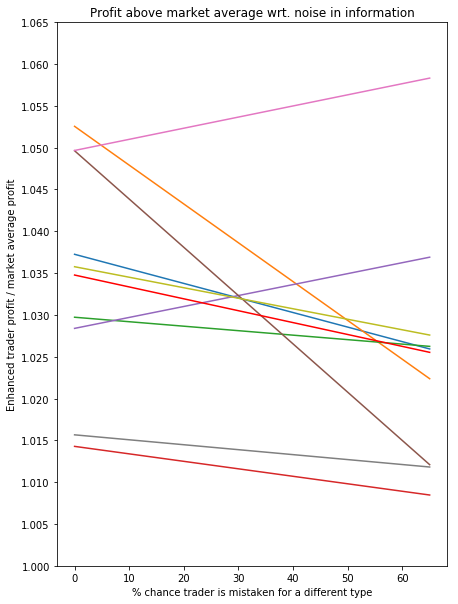

In [5]:
noise_coefficient = 0.05 * 100 
equal_line_x = [0, 66]
equal_line_y = [1, 1]
allfiles_trendline_x = []
allfiles_trendline_y = []

plt.figure(figsize=(7,10))
sc_marker = '+'
sc_marker_size=4
x_values = [x * noise_coefficient for x in order_schedule_num]
y_values = [y for y in allfiles_avg_extra_profit[0]]
        
#dots = plt.scatter(x_values, y_values, sc_marker_size, marker=sc_marker, c='#0000FF44')
plt.title("Profit above market average wrt. noise in information")
plt.ylabel("Enhanced trader profit / market average profit")
plt.xlabel("% chance trader is mistaken for a different type")
# plt.xticks(range(0,65,5))
plt.yticks(np.arange(1.0, 1.1, step=0.005))
plt.ylim(bottom=1, top=1.065)
# plt.ylim(bottom=1, top=1.4)
# plt.xlim(left=-1, right=66)
# plt.plot(equal_line_x, equal_line_y, c="g")
#schedule 6 and 7 is weird
downwardstrends = [0,1,2,3,4,5,8]
for k in range(0,9):
#for k in downwardstrends:
    linreg_array_x = np.array([x * noise_coefficient for x in order_schedule_num])
    allfiles_trendline_x.extend([x * noise_coefficient for x in order_schedule_num])
    linreg_array_y = np.array(allfiles_avg_extra_profit[k].copy())
    allfiles_trendline_y.extend(allfiles_avg_extra_profit[k].copy())
    coeffs = np.polyfit(linreg_array_x, linreg_array_y, 1)
    coeff_line_y = [coeffs[1], coeffs[1] + 65*coeffs[0]]
    coeff_line_x = [0, 65]
    print('Coefficients: ', coeffs[1], coeffs[0])
    plt.plot(coeff_line_x, coeff_line_y)
#     plt.scatter(linreg_array_x, linreg_array_y, 2)

coeffs = np.polyfit(np.array(allfiles_trendline_x), np.array(allfiles_trendline_y), 1)
coeff_line_y = [coeffs[1], coeffs[1] + 65*coeffs[0]]
coeff_line_x = [0, 65]
print('Allfiles coefficients: ', coeffs[1], coeffs[0])
plt.plot(coeff_line_x, coeff_line_y, c='r')
#ax = plt.subplot(111)
# ax.plot(coeff_line_x, coeff_line_y, label='Noisy information line fit', c="#444444")
#ax.plot(equal_line_x, equal_line_y, label='Line of no improvement',     c='#aaaaaa')
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
# ax.add_artist(lgnd)
plt.show()

In [6]:
# schedule_averaged_x = []
# schedule_averaged_y = []

# # Average every 455 trials - same schedule, same noise, for easier display
# for schedule_id in range(0, 10):
#     aep_avg  = 0
#     aap_avg  = 0
#     for ratio in range(0, 455):
#         aap_avg += avg_all_profit[(schedule_id * 455) + ratio]
#         aep_avg += avg_enhanced_profit[(schedule_id * 455) + ratio]
#     if (aap_avg != 0):
#         schedule_averaged_x.append(schedule_id * noise_coefficient)
#         schedule_averaged_y.append((aep_avg / aap_avg))
        
# linreg_array_x = np.array(schedule_averaged_x.copy())
# linreg_array_y = np.array(schedule_averaged_y.copy())
# coeffs = np.polyfit(linreg_array_x, linreg_array_y, 1)
# coeff_line_y = [coeffs[1], coeffs[1] + 75*coeffs[0]]
# coeff_line_x = [0, 75-7.5]
# print(coeffs[1], coeffs[0])

# plt.figure(figsize=(10,10))
# plt.xticks(range(0,80,5))
# plt.yticks(np.arange(0, 3, step=0.01))
# sc_marker = '+'
# sc_marker_size=24
# dots = plt.scatter( schedule_averaged_x, schedule_averaged_y, sc_marker_size, c='#b95a00', marker=sc_marker)
# plt.title("Profit above market average wrt. noise in information")
# plt.ylabel("Enhanced trader profit / market average profit")
# plt.xlabel("% chance trader is mistaken for a different type")
# plt.ylim(bottom=1.1)
# plt.xlim(left=-1)
# plt.plot(coeff_line_x, coeff_line_y, c='r')
# plt.show()

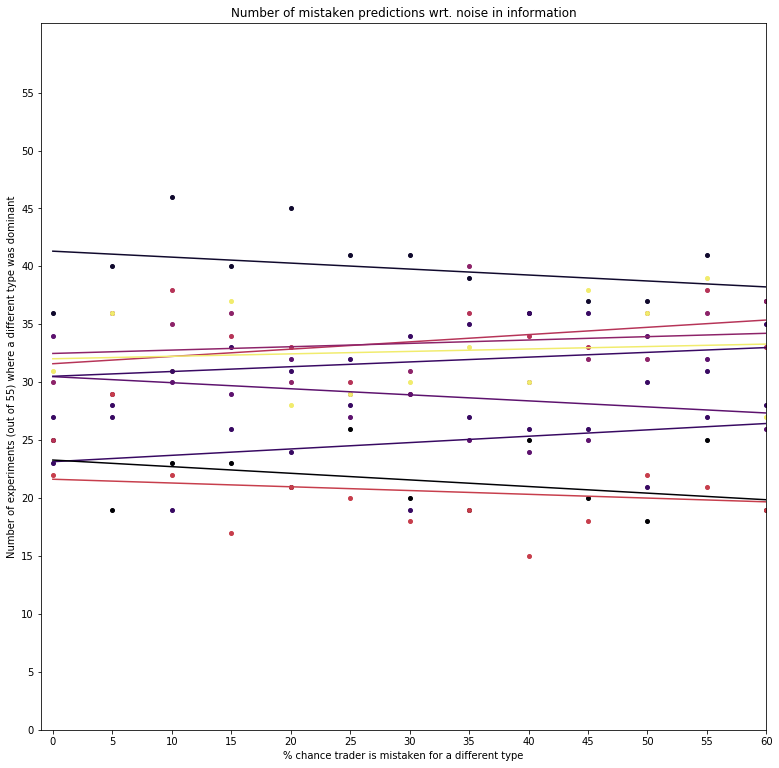

In [7]:
from matplotlib import colors
import matplotlib.cm as cm
allfiles_bad_pred_xs = []
allfiles_bad_pred_ys = []
noise_coefficient = 0.05 * 100
for k in range(0,9):
    bad_predictions = [x for x,y in zip(allfiles_enhanced_types[k], allfiles_best_trial_types[k]) if x != y]
    bad_prediction_ids = []
    good_predictions = [x for x,y in zip(allfiles_enhanced_types[k], allfiles_best_trial_types[k]) if x == y]
    for i in range(0, len(allfiles_enhanced_types[k])):
        if allfiles_enhanced_types[k][i] != allfiles_best_trial_types[k][i]:
            bad_prediction_ids.append(i)
    #bad_prediction_enhanced_profits = [avg_enhanced_profit[x] for x in bad_prediction_ids]
    # bad_prediction_all_profits = [avg_all_profit[x] for x in bad_prediction_ids]
    # bad_prediction_real_best_profits = [real_best_profit[x] for x in bad_prediction_ids]
    #diff_after_prediction = [a - b for a,b in zip(real_best_profit, avg_enhanced_profit)]
    #bad_prediction_diffs =  [diff_after_prediction[x] for x in bad_prediction_ids]
    bad_prediction_probs = [(x // 55) * noise_coefficient for x in bad_prediction_ids]
    bad_pred_xs = np.array(np.unique(bad_prediction_probs))
    bad_pred_ys = [bad_prediction_probs.count(x) for x in bad_pred_xs]
    allfiles_bad_pred_xs.append(bad_pred_xs)
    allfiles_bad_pred_ys.append(bad_pred_ys)




plt.figure(figsize=(13,13))
plt.xticks(range(0,65,5))
plt.yticks(range(0, 60, 5))
plt.ylim(bottom=0, top=61)
plt.xlim(left=-1)
sc_marker = '+'
sc_marker_size=4

colour_val_normalizer = matplotlib.colors.Normalize(vmin=100, vmax=200)
cmap = cm.inferno

m = cm.ScalarMappable(colour_val_normalizer, cmap=cmap)

for k in range(0,9):
    linreg_array_x = np.array(allfiles_bad_pred_xs[k])
    linreg_array_y = np.array(allfiles_bad_pred_ys[k])
    coeffs, residuals, rank, sing_v, rcond = np.polyfit(linreg_array_x, linreg_array_y, 1, full=True)
    coeff_line_y = [coeffs[1], coeffs[1] + 65*coeffs[0]]
    coeff_line_x = [0, 65]
    #print('Coefficients: ', coeffs[1], coeffs[0], 'Residuals (badness of fit): ', residuals)
    plt.plot(coeff_line_x, coeff_line_y, c=m.to_rgba(residuals[0]))
    dots = plt.scatter(allfiles_bad_pred_xs[k], allfiles_bad_pred_ys[k], 16,c=m.to_rgba(residuals))
plt.title("Number of mistaken predictions wrt. noise in information")
plt.ylabel("Number of experiments (out of 55) where a different type was dominant")
plt.xlabel("% chance trader is mistaken for a different type")
plt.show()

26.22235564435564 -0.017675585952508913
26.649884083033772 -0.01992068164539453


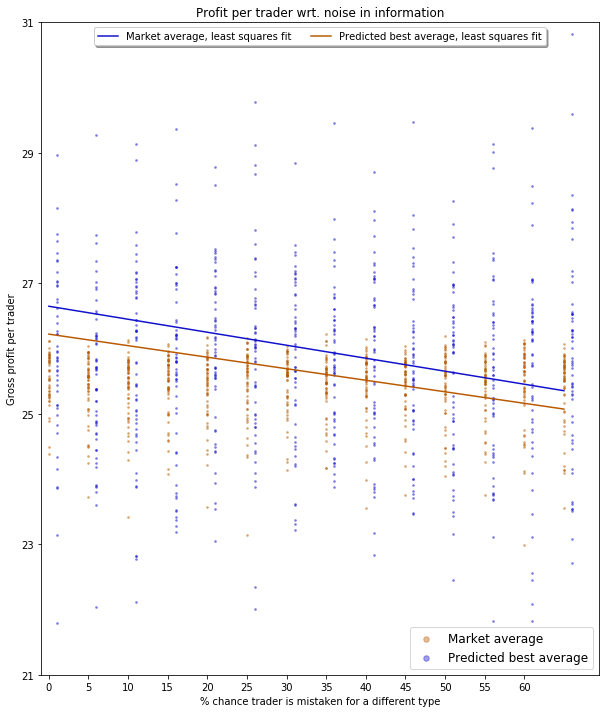

In [8]:
displayed_sched = 7

linreg_array_x = np.array([x * noise_coefficient for x in order_schedule_num])
linreg_array_y = np.array(allfiles_avg_all_profit[displayed_sched].copy())
market_avg_coeffs = np.polyfit(linreg_array_x, linreg_array_y, 1)
market_avg_coeff_line_y = [market_avg_coeffs[1], market_avg_coeffs[1] + 65*market_avg_coeffs[0]]
market_avg_coeff_line_x = [0, 65]
print(market_avg_coeffs[1], market_avg_coeffs[0])
linreg_array_x = np.array([x * noise_coefficient for x in order_schedule_num])
linreg_array_y = np.array(allfiles_avg_enhanced_profit[displayed_sched].copy())
enhanced_avg_coeffs = np.polyfit(linreg_array_x, linreg_array_y, 1)
enhanced_avg_coeff_line_y = [enhanced_avg_coeffs[1], enhanced_avg_coeffs[1] + 65*enhanced_avg_coeffs[0]]
enhanced_avg_coeff_line_x = [0, 65]
print(enhanced_avg_coeffs[1], enhanced_avg_coeffs[0])

plt.figure(figsize=(10,12))
plt.xticks(range(0,65,5))
plt.yticks(np.arange(5, 40, step=2))
sc_marker = 'o'
sc_marker_size=3
base_profit_dots = plt.scatter([x * noise_coefficient for x in order_schedule_num], allfiles_avg_all_profit[displayed_sched], sc_marker_size, c='#b95a0066', marker=sc_marker)
enhanced_profit_dots =  plt.scatter(np.add(1, [x * noise_coefficient for x in order_schedule_num]), allfiles_avg_enhanced_profit[displayed_sched], sc_marker_size, c='#1111cc66', marker=sc_marker)
plt.title("Profit per trader wrt. noise in information")
plt.ylabel("Gross profit per trader")
plt.xlabel("% chance trader is mistaken for a different type")
plt.ylim(bottom=21, top=31)
plt.xlim(left=-1)
# plt.axes().set_aspect('equal', 'box')
ax = plt.subplot(111)
ax.plot(enhanced_avg_coeff_line_x, enhanced_avg_coeff_line_y, c='#1111cc', label='Market average, least squares fit')
ax.plot(market_avg_coeff_line_x, market_avg_coeff_line_y, c='#b95a00', label='Predicted best average, least squares fit')


lgnd = plt.legend((base_profit_dots, enhanced_profit_dots),
            ('Market average', 'Predicted best average'), fontsize = 12, loc='lower right')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2, fontsize=10)
ax.add_artist(lgnd)
plt.show()

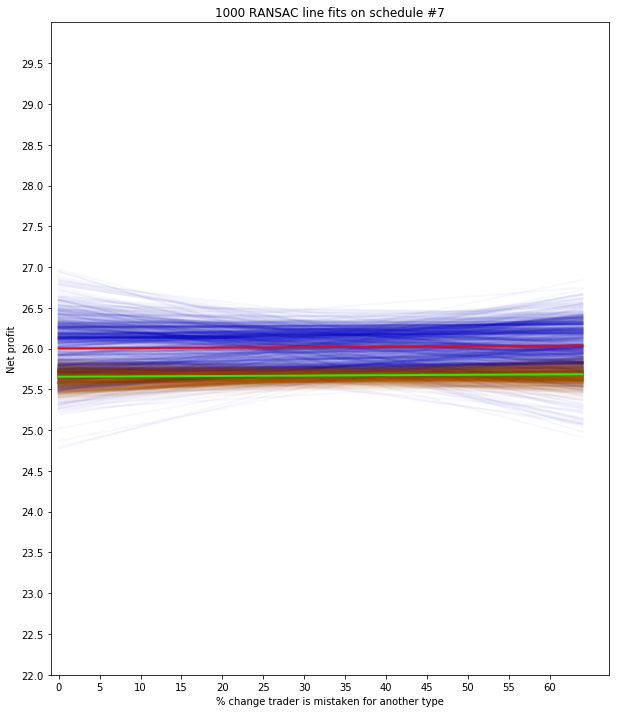

In [9]:
from sklearn import linear_model
# Try RANSAC line fits, repeated because it's stochastic. Not quite what this data needs.
# Originally the idea was that it's better at handling outliers, 
# but it's too uncertain in what correlation it presents

lw = 2
sc_marker = 'o'
sc_marker_size=2
# Predict data of estimated models
plt.figure(figsize=(10,12))


market_avg_line_accumulator_x = []
market_avg_line_accumulator_y = []
enhanced_line_accumulator_x = []
enhanced_line_accumulator_y = []

for sched_num in range(7,8):
    for k in range(0,1000):
        # Plot market average
        ransac = linear_model.RANSACRegressor()
        X = np.array([x * noise_coefficient for x in order_schedule_num]).reshape(-1, 1)
        Y = np.array(allfiles_avg_all_profit[sched_num])
        ransac.fit(X, Y)
        line_X = np.arange(X.min(), X.max())[:, np.newaxis]
        line_y_ransac = ransac.predict(line_X)
        #base_profit_dots = plt.scatter([x * noise_coefficient for x in order_schedule_num], allfiles_avg_all_profit[sched_num], sc_marker_size, c='#b95a0066', marker=sc_marker)
        #enhanced_profit_dots =  plt.scatter(np.add(1, [x * noise_coefficient for x in order_schedule_num]), allfiles_avg_enhanced_profit[sched_num], sc_marker_size, c='#1111cc66', marker=sc_marker)
        plt.plot(line_X, line_y_ransac, c='#b95a0008', linewidth=lw,
                 label='Market average profit')
        if k == 0:
            market_avg_line_accumulator_x = line_X
            market_avg_line_accumulator_y = line_y_ransac
        else:
            market_avg_line_accumulator_x = np.add(market_avg_line_accumulator_x, line_X)
            market_avg_line_accumulator_y = np.add(market_avg_line_accumulator_y, line_y_ransac)
        # Plot enhanced average
        ransac2 = linear_model.RANSACRegressor()
        X2 = np.array([x * noise_coefficient for x in order_schedule_num]).reshape(-1, 1)
        Y2 = np.array(allfiles_avg_enhanced_profit[sched_num])
        ransac2.fit(X2, Y2)
        line_X2 = np.arange(X2.min(), X2.max())[:, np.newaxis]
        enhanced_profit_ransac = ransac2.predict(line_X2)
        plt.plot(line_X2, enhanced_profit_ransac, c='#1111cc08', linewidth=lw,
                 label='Enhanced agent profit')
        if k == 0:
#             enhanced_line_accumulator_x = [line_X2[0], line_X2[-1]]
#             enhanced_line_accumulator_y = [enhanced_profit_ransac[0], enhanced_profit_ransac[-1]]
            enhanced_line_accumulator_x = line_X2
            enhanced_line_accumulator_y = enhanced_profit_ransac
        else:
#             enhanced_line_accumulator_x += [line_X2[0], line_X2[-1]]
#             enhanced_line_accumulator_y += [enhanced_profit_ransac[0], enhanced_profit_ransac[-1]]
            enhanced_line_accumulator_x = np.add(enhanced_line_accumulator_x, line_X2)
            enhanced_line_accumulator_y = np.add(enhanced_line_accumulator_y, enhanced_profit_ransac)
#plt.legend(loc='lower right')
avg_ransac_fit_x = [x/1000 for x in market_avg_line_accumulator_x]
enhanced_ransac_fit_x = [x/1000 for x in enhanced_line_accumulator_x]
avg_ransac_fit_y = [y/1000 for y in market_avg_line_accumulator_y]
enhanced_ransac_fit_y = [y/1000 for y in enhanced_line_accumulator_y]
plt.plot(avg_ransac_fit_x, avg_ransac_fit_y, c='#00ff00', linewidth=lw, label='Market average profit')
plt.plot(enhanced_ransac_fit_x, enhanced_ransac_fit_y, c='#ff0000', linewidth=lw, label='Enhanced agent profit')
plt.xticks(range(0,65,5))
plt.yticks(np.arange(22, 30, step=0.5))
plt.ylim(bottom=22, top=30)
plt.xlim(left=-1)
plt.title('1000 RANSAC line fits on schedule #7')
plt.xlabel("% change trader is mistaken for another type")
plt.ylabel("Net profit")
plt.show()



1.0043731021570426 -0.004588396780548653
1.296938487131269 -0.004811509061842765
0.916861571437363 -0.002284658473305162
0.378871680777622 -0.0017150246492092392
0.9428705033726273 0.004425902852040268
1.0521397488079915 0.0016135353302451348
0.9859242986805193 0.0026754692705694442
0.4275284386781224 -0.0022450956928855882
0.3552576742761237 -0.0012710238045769548


/home/bmiki/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


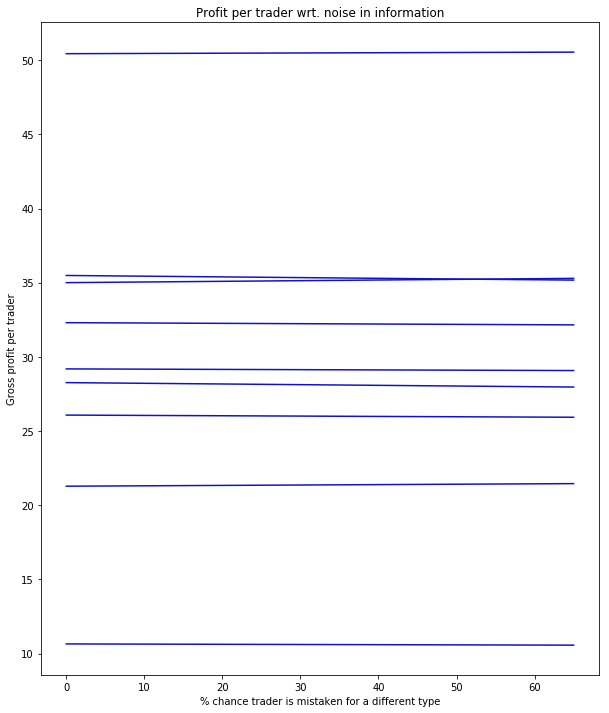

In [10]:
import statistics
# Try to eliminate outliers by pairwise comparison of averages and enhanced profits. Not ideal either.
plt.figure(figsize=(10,12))

plt.title("Profit per trader wrt. noise in information")
plt.ylabel("Gross profit per trader")
plt.xlabel("% chance trader is mistaken for a different type")
# plt.xticks(range(0,65,5))
# plt.yticks(np.arange(5, 40, step=2))
# plt.ylim(bottom=21, top=31)
# plt.xlim(left=-1, right=66)
sc_marker = 'o'
sc_marker_size=3
# plt.axes().set_aspect('equal', 'box')
ax = plt.subplot(111)


for sch_num in range(0,9):
    pairwise_diffs = [a-b for a,b in zip(allfiles_avg_enhanced_profit[sch_num], allfiles_avg_all_profit[sch_num])]
    linreg_array_x = np.array([x * noise_coefficient for x in order_schedule_num])
    linreg_array_y = np.array(pairwise_diffs.copy())
    pairwise_coeffs = np.polyfit(linreg_array_x, linreg_array_y, 1)
    pairwise_coeff_line_y = [pairwise_coeffs[1], pairwise_coeffs[1] + 65*pairwise_coeffs[0]]
    pairwise_coeff_line_x = [0, 65]
    print(pairwise_coeffs[1], pairwise_coeffs[0])
    market_avg_price = statistics.mean(allfiles_avg_all_profit[sch_num])
    market_avg_line_x = [0, 65]
    market_avg_line_y = [market_avg_price, market_avg_price]

#     base_profit_dots = plt.scatter(linreg_array_x, allfiles_avg_all_profit[sch_num], sc_marker_size, c='#b95a0066', marker=sc_marker)
#     enhanced_profit_dots =  plt.scatter(np.add(1, linreg_array_x), allfiles_avg_enhanced_profit[sch_num], sc_marker_size, c='#1111cc66', marker=sc_marker)

    ax.plot(pairwise_coeff_line_x, [y+market_avg_price for y in pairwise_coeff_line_y], c='#1111cc', label='Fit on pairwise differences')
    #ax.plot(market_avg_line_x, market_avg_line_y, c='#b95a00', label='Market average line')
    
# lgnd = plt.legend((base_profit_dots, enhanced_profit_dots),
#             ('Market average', 'Predicted best average'), fontsize = 12, loc='lower right')
# lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2, fontsize=10)
# ax.add_artist(lgnd)
plt.show()

Outliers eliminated
1.033685467563341 -0.009776042601261132
[2.56340414]
1.031785922880051 -0.0006034219199589181
[1.57998943]
1.028529096489153 -0.008343028692531177
[5.91105596]
1.011280554693736 -0.012966258116898315
[4.86433163]
1.0276622628511969 0.013414508363489688
[3.71238008]
1.0125615392322986 0.018727207125783345
[3.72962382]
1.0499528618593017 0.010176771006994345
[4.04586198]
1.0161905166472056 -0.010153220039531789
[2.03760596]
1.0357547751799567 -0.014922596951549301
[3.70685443]


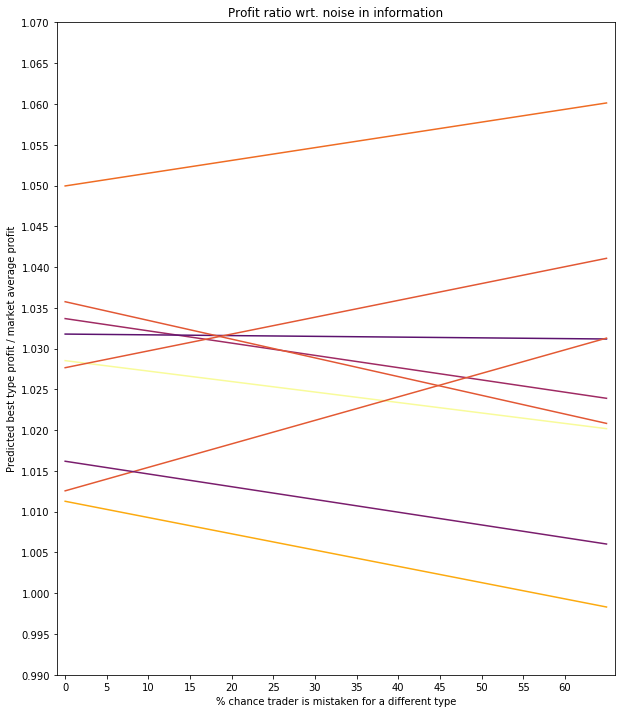

In [11]:
prob_points = 14
prob_step = 0.05
values_per_probability = 55
percentile_cutoff = 10
inter_percentile_range_mul = 1

avg_no_outliers         = []
ratio_no_outliers       = []
ratio_no_outliers_probs = []
aep_no_outliers         = []
aep_no_outliers_probs   = []
for k in range(0, 9):
    schedule_no_outliers             = []
    schedule_ratio_no_outliers       = []
    schedule_ratio_no_outliers_probs = []
    schedule_avg_no_outliers         = []
    schedule_no_outliers_probs       = []
    for i in range(0, prob_points):
        ind_start = i * values_per_probability
        ind_end   = ind_start + values_per_probability
        en_p = allfiles_avg_enhanced_profit[k][ind_start:ind_end]
        avg_p = allfiles_avg_all_profit[k][ind_start:ind_end]
        ex_p = allfiles_avg_extra_profit[k][ind_start:ind_end]
        
        ex_q3 = np.percentile(ex_p, 100-percentile_cutoff, interpolation='higher')
        ex_q1 = np.percentile(ex_p, percentile_cutoff, interpolation='lower')
        ex_iqr = ex_q3 - ex_q1
        ex_outlier_high = ex_q3 + (ex_iqr * inter_percentile_range_mul)
        ex_outlier_low  = ex_q1 - (ex_iqr * inter_percentile_range_mul)
        
        q3 = np.percentile(en_p, 100-percentile_cutoff, interpolation='higher')
        q1 = np.percentile(en_p, percentile_cutoff, interpolation='lower')
        iqr = q3 - q1
        outlier_high = q3 + (iqr * inter_percentile_range_mul)
        outlier_low = q1 - (iqr * inter_percentile_range_mul)
        
        
        
        in_quartile_values = [x for x in en_p if x < outlier_high and x > outlier_low]
        in_quartile_averages = [y for x,y in zip(en_p, avg_p) if x < outlier_high and x > outlier_low]
        in_quartile_ratios = [x for x in ex_p if x < ex_outlier_high and x > ex_outlier_low]
        current_probs = [i * prob_step for x in in_quartile_values]
        ex_current_probs = [i * prob_step for x in in_quartile_ratios]
        schedule_no_outliers.extend(in_quartile_values)
        schedule_ratio_no_outliers.extend(in_quartile_ratios)
        schedule_ratio_no_outliers_probs.extend(ex_current_probs)
        schedule_avg_no_outliers.extend(in_quartile_averages)
        schedule_no_outliers_probs.extend(current_probs)
    
    ratio_no_outliers.append(schedule_ratio_no_outliers)
    ratio_no_outliers_probs.append(schedule_ratio_no_outliers_probs)
    avg_no_outliers.append(schedule_no_outliers)
    aep_no_outliers.append(schedule_avg_no_outliers)
    aep_no_outliers_probs.append(schedule_no_outliers_probs)
    
print('Outliers eliminated')
# for i in range(0,9):
#     print(min(allfiles_avg_enhanced_profit[i]), max(allfiles_avg_enhanced_profit[i]))
#     print(min(aep_no_outliers[i]), max(aep_no_outliers[i]))

colour_val_normalizer = matplotlib.colors.Normalize(vmin=0, vmax=6)
cmap = cm.inferno
m = cm.ScalarMappable(colour_val_normalizer, cmap=cmap)

plt.figure(figsize=(10,12))
plt.title("Profit ratio wrt. noise in information")
plt.ylabel("Predicted best type profit / market average profit")
plt.xlabel("% chance trader is mistaken for a different type")
plt.xticks(range(0,65,5))
plt.yticks(np.arange(0.99, 1.07, step=0.005))
plt.ylim(bottom=0.990, top=1.07)
plt.xlim(left=-1, right=66)
sc_marker = 'o'
sc_marker_size=3
# plt.axes().set_aspect('equal', 'box')
ax = plt.subplot(111)
for sch_num in range(0,9):
#     linreg_array_x = aep_no_outliers_probs[sch_num]
#     linreg_array_y = np.divide(aep_no_outliers[sch_num], avg_no_outliers[sch_num])
    linreg_array_x = ratio_no_outliers_probs[sch_num]
    linreg_array_y = ratio_no_outliers[sch_num]
    coeffs, residuals, a, b, c = np.polyfit(linreg_array_x, linreg_array_y, 1, full=True)
    coeff_line_y = [coeffs[1], coeffs[1] + coeffs[0]]
    coeff_line_x = [0, 65]
    print(coeffs[1], coeffs[0])
    print(residuals)
    ax.plot(coeff_line_x, coeff_line_y, c=m.to_rgba(residuals[0]))
    #plt.scatter([x * 100 for x in linreg_array_x], linreg_array_y, 2)
plt.show()

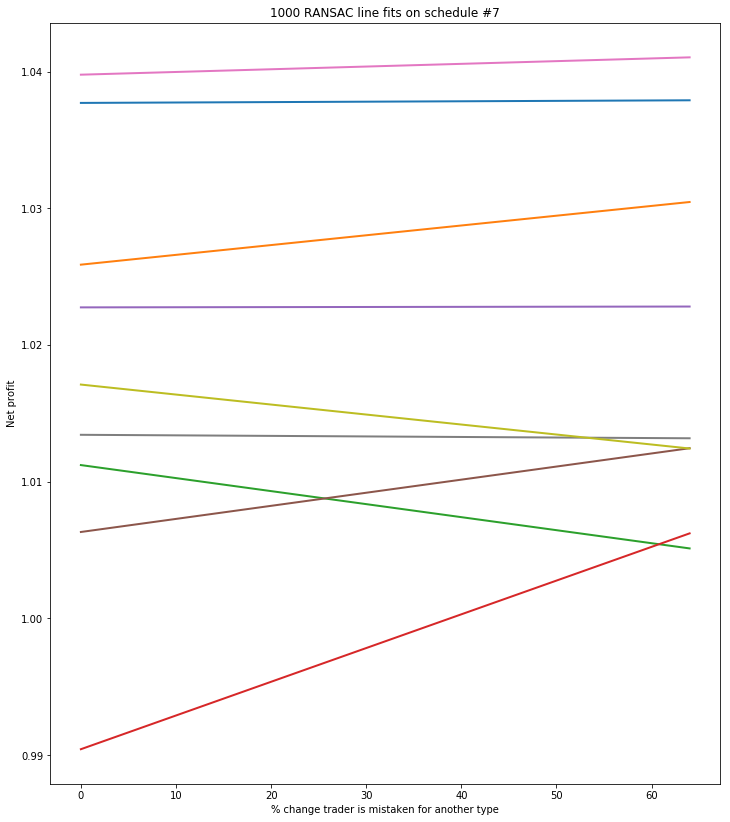

In [12]:
lw = 2
sc_marker = 'o'
sc_marker_size=2
# Predict data of estimated models
plt.figure(figsize=(12,14))
import statistics
# RANSAC fits still not optimal, disregard this graph as it confers no valuable insight

for sched_num in range(0,9):
    market_avg_line_accumulator_x = []
    market_avg_line_accumulator_y = []
#     market_avg_line_accumulator_y = {}
#     market_avg_line_accumulator_y['0'] = []
#     market_avg_line_accumulator_y['1'] = []
    enhanced_line_accumulator_x = []
    enhanced_line_accumulator_y = []
#     enhanced_line_accumulator_x = {}
#     enhanced_line_accumulator_y = {}
#     enhanced_line_accumulator_y['0'] = []
#     enhanced_line_accumulator_y['1'] = []
    for k in range(0,1000):
        # Plot market average
        ransac = linear_model.RANSACRegressor()
        X = np.array([x * noise_coefficient for x in order_schedule_num]).reshape(-1, 1)
        Y = np.array(allfiles_avg_all_profit[sched_num])
        ransac.fit(X, Y)
        line_X = np.arange(X.min(), X.max())[:, np.newaxis]
        line_y_ransac = ransac.predict(line_X)
        #base_profit_dots = plt.scatter([x * noise_coefficient for x in order_schedule_num], allfiles_avg_all_profit[sched_num], sc_marker_size, c='#b95a0066', marker=sc_marker)
        #enhanced_profit_dots =  plt.scatter(np.add(1, [x * noise_coefficient for x in order_schedule_num]), allfiles_avg_enhanced_profit[sched_num], sc_marker_size, c='#1111cc66', marker=sc_marker)
        #plt.plot(line_X, line_y_ransac, c='#b95a0008', linewidth=lw,label='Market average profit')
        if k == 0:
            market_avg_line_accumulator_x = line_X
            market_avg_line_accumulator_y = line_y_ransac
#             market_avg_line_accumulator_y['0'].append(line_y_ransac[:1][0])
#             market_avg_line_accumulator_y['1'].append(line_y_ransac[-1:][0])
        else:
            market_avg_line_accumulator_x = np.add(market_avg_line_accumulator_x, line_X)
            market_avg_line_accumulator_y = np.add(market_avg_line_accumulator_y, line_y_ransac)
#             market_avg_line_accumulator_y['0'].append(line_y_ransac[:1][0])
#             market_avg_line_accumulator_y['1'].append(line_y_ransac[-1:][0])
        # Plot enhanced average
        ransac2 = linear_model.RANSACRegressor()
        X2 = np.array([x * noise_coefficient for x in order_schedule_num]).reshape(-1, 1)
        Y2 = np.array(allfiles_avg_enhanced_profit[sched_num])
        ransac2.fit(X2, Y2)
        line_X2 = np.arange(X2.min(), X2.max())[:, np.newaxis]
        enhanced_profit_ransac = ransac2.predict(line_X2)
        #plt.plot(line_X2, enhanced_profit_ransac, c='#1111cc08', linewidth=lw,label='Enhanced agent profit')
        if k == 0:
            enhanced_line_accumulator_x = line_X2
            enhanced_line_accumulator_y = enhanced_profit_ransac
#             enhanced_line_accumulator_y['0'].append(enhanced_profit_ransac[:1][0])
#             enhanced_line_accumulator_y['1'].append(enhanced_profit_ransac[-1:][0])
        else:
#             enhanced_line_accumulator_y['0'].append(enhanced_profit_ransac[:1][0])
#             enhanced_line_accumulator_y['1'].append(enhanced_profit_ransac[-1:][0])
            enhanced_line_accumulator_x = np.add(enhanced_line_accumulator_x, line_X2)
            enhanced_line_accumulator_y = np.add(enhanced_line_accumulator_y, enhanced_profit_ransac)
    avg_ransac_fit_x = [x/1000 for x in market_avg_line_accumulator_x]
    enhanced_ransac_fit_x = [x/1000 for x in enhanced_line_accumulator_x]
    avg_ransac_fit_y = [y/1000 for y in market_avg_line_accumulator_y]
    enhanced_ransac_fit_y = [y/1000 for y in enhanced_line_accumulator_y]
    #plt.plot(avg_ransac_fit_x, avg_ransac_fit_y, c='#00ff00', linewidth=lw, label='Market average profit')
    plt.plot(enhanced_ransac_fit_x, [a/b for a,b in zip(enhanced_ransac_fit_y, avg_ransac_fit_y)], linewidth=lw, label='Predicted best profit ratio')
# plt.xticks(range(0,65,5))
# plt.yticks(np.arange(1, 1.1, step=0.05))
# plt.ylim(bottom=0.9, top=1.1)
# plt.xlim(left=-1)
plt.title('1000 RANSAC line fits on schedule #7')
plt.xlabel("% change trader is mistaken for another type")
plt.ylabel("Net profit")
plt.show()


In [1]:
from sklearn import linear_model
# Again, RANSAC experimentation.
ransac = linear_model.RANSACRegressor()
X = np.array([x * noise_coefficient for x in order_schedule_num]).reshape(-1, 1)
Y = np.array(allfiles_avg_all_profit[displayed_sched])
ransac.fit(X, Y)

lw = 2
sc_marker = '+'
sc_marker_size=2
# Predict data of estimated models
plt.figure(figsize=(10,12))
plt.ylim(bottom=30, top=40)
plt.xlim(left=-1)
plt.xticks(range(0,65,5))
plt.yticks(np.arange(20, 45, step=1))

line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)
base_profit_dots = plt.scatter([x * noise_coefficient for x in order_schedule_num], allfiles_avg_all_profit[displayed_sched], sc_marker_size, c='#b95a0066', marker=sc_marker)
enhanced_profit_dots =  plt.scatter(np.add(1, [x * noise_coefficient for x in order_schedule_num]), allfiles_avg_enhanced_profit[displayed_sched], sc_marker_size, c='#1111cc66', marker=sc_marker)
plt.plot(line_X, line_y_ransac, c='#b95a00', linewidth=lw,
         label='Market average profit')

ransac2 = linear_model.RANSACRegressor()
X2 = np.array([x * noise_coefficient for x in order_schedule_num]).reshape(-1, 1)
Y2 = np.array(allfiles_avg_enhanced_profit[displayed_sched])
ransac2.fit(X2, Y2)
line_X2 = np.arange(X2.min(), X2.max())[:, np.newaxis]
enhanced_profit_ransac = ransac2.predict(line_X2)
plt.plot(line_X2, enhanced_profit_ransac, c='#1111cc66', linewidth=lw,
         label='Enhanced agent profit')
plt.legend(loc='lower right')
plt.xlabel("% change trader is mistaken for another type")
plt.ylabel("Net profit")
plt.show()

NameError: name 'np' is not defined

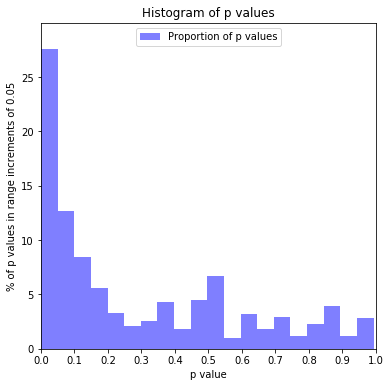

In [24]:
num_bins = 20
num_p_values = len(all_pvalues)


# plt.figure(figsize=(14,10))
# plt.xticks(np.arange(0, 1.05, step=0.05))
# plt.xlim(left=0)
# n, bins, patches = plt.hist(all_pvalues, num_bins, facecolor='blue', alpha=0.5)
# plt.show()


plt.figure(figsize=(6,6))
plt.title("Histogram of p values")
plt.ylabel("% of p values in range increments of 0.05")
plt.xlabel("p value")
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0,30, step=5))
plt.xlim(left=0, right=1)
plt.ylim(bottom=0, top=30)
n, bins, patches = plt.hist(all_pvalues, num_bins, weights=(np.ones(num_p_values) / num_p_values)*100, facecolor='blue', alpha=0.5, label='Proportion of p values')
plt.legend(loc='upper center')

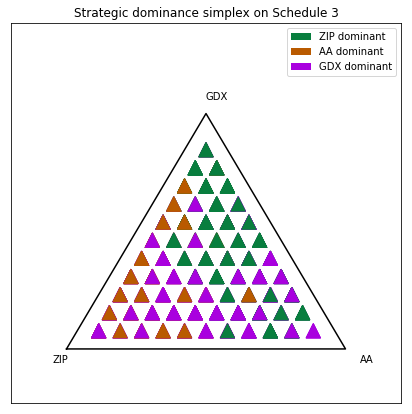

In [17]:
def ttc(typestring):
    aa_colour   = '#b95a00' # Brown
    gdx_colour  = '#a900df' # Purple
    zip_colour  = '#087e3e' # Dark green
    if 'AA' in typestring:
        return aa_colour
    elif 'GDX' in typestring:
        return gdx_colour
    elif 'ZIP' in typestring:
        return zip_colour

"""
Visualize points on the 3-simplex (eg, the parameters of a
3-dimensional multinomial distributions) as a scatter plot 
contained within a 2D triangle.
David Andrzejewski (david.andrzej@gmail.com)
"""
import numpy as NP
import matplotlib.pyplot as P
import matplotlib.ticker as MT
import matplotlib.lines as L
import matplotlib.colors as C
import matplotlib.patches as PA

def plotSimplex(points, fig=None, 
                vertexlabels=['1','2','3'],
                **kwargs):
    """
    Plot Nx3 points array on the 3-simplex 
    (with optionally labeled vertices) 
    
    kwargs will be passed along directly to matplotlib.pyplot.scatter    
    Returns Figure, caller must .show()
    """
    if(fig == None):        
        fig = P.figure()
    # Draw the triangle
    l1 = L.Line2D([0, 0.5, 1.0, 0], # xcoords
                  [0, NP.sqrt(3) / 2, 0, 0], # ycoords
                  color='k')
    fig.gca().add_line(l1)
    fig.gca().xaxis.set_major_locator(MT.NullLocator())
    fig.gca().yaxis.set_major_locator(MT.NullLocator())
    # Draw vertex labels
    fig.gca().text(-0.05, -0.05, vertexlabels[0])
    fig.gca().text(1.05, -0.05, vertexlabels[1])
    fig.gca().text(0.5, NP.sqrt(3) / 2 + 0.05, vertexlabels[2])
    # Project and draw the actual points
    projected = projectSimplex(points)
    P.scatter(projected[:,0], projected[:,1], **kwargs)              
    # Leave some buffer around the triangle for vertex labels
    fig.gca().set_xlim(-0.2, 1.2)
    fig.gca().set_ylim(-0.2, 1.2)

    return fig    

def projectSimplex(points):
    """ 
    Project probabilities on the 3-simplex to a 2D triangle
    
    N points are given as N x 3 array
    """
    # Convert points one at a time
    tripts = NP.zeros((points.shape[0],2))
    for idx in range(points.shape[0]):
        # Init to triangle centroid
        x = 1.0 / 2
        y = 1.0 / (2 * NP.sqrt(3))
        # Vector 1 - bisect out of lower left vertex 
        p1 = points[idx, 0]
        x = x - (1.0 / NP.sqrt(3)) * p1 * NP.cos(NP.pi / 6)
        y = y - (1.0 / NP.sqrt(3)) * p1 * NP.sin(NP.pi / 6)
        # Vector 2 - bisect out of lower right vertex  
        p2 = points[idx, 1]  
        x = x + (1.0 / NP.sqrt(3)) * p2 * NP.cos(NP.pi / 6)
        y = y - (1.0 / NP.sqrt(3)) * p2 * NP.sin(NP.pi / 6)        
        # Vector 3 - bisect out of top vertex
        p3 = points[idx, 2]
        y = y + (1.0 / NP.sqrt(3) * p3)
      
        tripts[idx,:] = (x,y)

    return tripts

display_schedule = 3
subtrials_per_trial = 50
enhanced_traders_per_trial = 26

simplex_colours = []
simplex_points  = []
for i in range(0, len(allfiles_best_trial_types[display_schedule])):
    current_exp_data = exp_data[display_schedule]["enhanced"]
    point_type   = allfiles_best_trial_types[display_schedule][i]
    zip_count    = current_exp_data[i*subtrials_per_trial][' ZIP']['num_traders']
    aa_count     = current_exp_data[i*subtrials_per_trial][' AA']['num_traders']
    gdx_count    = current_exp_data[i*subtrials_per_trial][' GDX']['num_traders']
    zip_ratio    = zip_count / 26
    aa_ratio     = aa_count  / 26
    gdx_ratio    = gdx_count / 26 
    new_point    = [zip_ratio, aa_ratio, gdx_ratio]
    simplex_points.append(new_point)
    point_colour = ttc(point_type)
    simplex_colours.append(point_colour)
simplex_points = np.array(simplex_points)
# Define a synthetic test dataset
labels = ('ZIP', 
          'AA', 
          'GDX',)

sim = plt.figure(figsize=(7,7))
plt.title("Strategic dominance simplex on Schedule " + str(display_schedule))
plt.xticks(np.arange(0, 1.05, step=0.1))
plt.xlim(left=0)
plt.ylim(bottom=0, top=1)
fig = plotSimplex(simplex_points, vertexlabels=labels, fig=sim, c=simplex_colours, marker='^', s=200)
# Make legend
P.legend([PA.Rectangle((0, 0), 1, 1, fc='#087e3e'),PA.Rectangle((0, 0), 1, 1, fc='#b95a00'),PA.Rectangle((0, 0), 1, 1, fc='#a900df')], 
          ['ZIP dominant', 'AA dominant', 'GDX dominant'])

P.show()